In [1]:
from datasets import load_from_disk, Array2D
import torch
import numpy as np
import time
from collections import Counter


In [2]:
ds = load_from_disk("../datasets_cache/v4-fsl-143-v1-v2-20fps-with-flipped")
ds


DatasetDict({
    train: Dataset({
        features: ['id', 'label', 'category', 'file', 'pose', 'face', 'lh', 'rh', 'pose_mean', 'face_mean', 'lh_mean', 'rh_mean', 'pose_angles', 'lh_angles', 'rh_angles', 'fps', 'keypoints_length'],
        num_rows: 4752
    })
    test: Dataset({
        features: ['id', 'label', 'category', 'file', 'pose', 'face', 'lh', 'rh', 'pose_mean', 'face_mean', 'lh_mean', 'rh_mean', 'pose_angles', 'lh_angles', 'rh_angles', 'fps', 'keypoints_length'],
        num_rows: 1189
    })
})

In [3]:
train_ctr = Counter(ds['train']['label']).most_common()
test_ctr = Counter(ds['test']['label']).most_common()
feature = ds["train"].features['label']


train_ctr = list(map(lambda item: (feature.int2str(item[0]), item[1]), train_ctr))
test_ctr = list(map(lambda item: (feature.int2str(item[0]), item[1]), test_ctr))

print(train_ctr)
print(test_ctr)

[('IDLE', 71), ('CORRECT', 35), ('NOVEMBER', 35), ('DECEMBER', 35), ('AUGUST', 35), ('GOOD EVENING', 35), ('NICE TO MEET YOU', 35), ('DRINK', 34), ('JULY', 34), ('COUSIN', 34), ('GREEN', 34), ('DEAF', 34), ('NO', 34), ('SEVEN', 34), ('WRONG', 34), ('I (ME)', 34), ('M', 34), ('YOURS', 34), ('TOMORROW', 34), ('MINE', 34), ('O', 34), ('D', 34), ('KNOW', 34), ('BOY', 34), ('F', 34), ('W', 34), ('Q', 34), ('J', 34), ('N', 34), ('X', 34), ('Y', 34), ('V', 34), ('JUICE', 34), ('GOOD AFTERNOON', 34), ('A', 34), ('U', 34), ('WE', 34), ('I', 34), ('YOU ARE BEAUTIFUL', 34), ('K', 34), ('S', 34), ('WHAT IS YOUR NAME', 34), ('EAT', 33), ('EIGHT', 33), ('MY', 33), ('IM SORRY', 33), ('YOU', 33), ('UNCLE', 33), ('FAST', 33), ('G', 33), ('COLD', 33), ('P', 33), ('SUGAR', 33), ('DON’T UNDERSTAND', 33), ('MAY', 33), ('C', 33), ('L', 33), ('Z', 33), ('R', 33), ('B', 33), ('HOW OLD ARE YOU', 33), ('HOW ARE YOU', 33), ('T', 33), ('SLOW', 33), ('WEELCHAIR PERSON', 32), ('YELLOW', 32), ('RED', 32), ('FIVE', 3

In [4]:
train_ctr = Counter(ds["train"]["keypoints_length"]).most_common()
test_ctr = Counter(ds["test"]["keypoints_length"]).most_common()

print(train_ctr)
print(test_ctr)
print(
    "min train",
    min(ds["train"]["keypoints_length"]),
    "min test",
    min(ds["test"]["keypoints_length"]),
)
print(
    "max train",
    max(ds["train"]["keypoints_length"]),
    "max test",
    max(ds["test"]["keypoints_length"]),
)
print(
    "avg train",
    sum(ds["train"]["keypoints_length"]) / len(ds["train"]["keypoints_length"]),
    "avg test",
    sum(ds["test"]["keypoints_length"]) / len(ds["test"]["keypoints_length"]),
)

[(28, 288), (27, 282), (30, 268), (31, 257), (26, 241), (25, 240), (29, 240), (32, 220), (24, 185), (33, 164), (23, 160), (22, 136), (34, 136), (36, 127), (35, 106), (37, 105), (21, 88), (38, 80), (39, 62), (20, 59), (40, 51), (19, 44), (43, 42), (41, 41), (42, 40), (44, 32), (18, 30), (65, 26), (57, 25), (45, 24), (58, 22), (63, 22), (56, 20), (59, 20), (62, 20), (53, 19), (54, 19), (64, 19), (75, 19), (111, 19), (73, 18), (55, 16), (68, 16), (69, 16), (71, 16), (60, 15), (48, 14), (52, 14), (66, 14), (81, 14), (61, 13), (67, 13), (77, 13), (104, 13), (17, 12), (46, 12), (49, 12), (79, 12), (47, 11), (50, 11), (76, 11), (51, 10), (70, 10), (103, 10), (16, 9), (72, 9), (74, 9), (95, 9), (102, 9), (114, 9), (82, 8), (94, 8), (106, 8), (128, 8), (144, 8), (160, 8), (167, 8), (112, 7), (133, 7), (162, 7), (80, 6), (88, 6), (89, 6), (93, 6), (97, 6), (105, 6), (107, 6), (125, 6), (150, 6), (163, 6), (175, 6), (176, 6), (15, 5), (92, 5), (96, 5), (108, 5), (109, 5), (110, 5), (122, 5), (123

In [7]:
long = ds.filter(lambda x: x["keypoints_length"] > 300)
print(ds["train"]["file"][0])

Filter:   0%|          | 0/4752 [00:00<?, ? examples/s]

Filter:   0%|          | 0/1189 [00:00<?, ? examples/s]

../Dataset/fsl-143-v1\clips/1\15.MOV


In [9]:
pose = ds["train"][0]["pose"][0]
print(np.mean(pose[0::4]))
print(np.mean(pose[1::4]))
print(np.mean(pose[2::4]))
# test = torch.concat([pose, face, rh, lh])
# print(test.shape)

-1.045974027929884e-09
-3.83817788326379e-09
2.5964144504431524e-09


In [3]:
ds["train"].features
# ds["train"].flatten()

{'id': Value(dtype='int64', id=None),
 'label': ClassLabel(names=['A', 'APRIL', 'AUGUST', 'AUNTIE', 'B', 'BEER', 'BLACK', 'BLIND', 'BLUE', 'BOY', 'BREAD', 'BROWN', 'C', 'CHICKEN', 'COFFEE', 'COLD', 'CORRECT', 'COUSIN', 'CRAB', 'D', 'DARK', 'DAUGHTER', 'DEAF', 'DEAF BLIND', 'DECEMBER', 'DON’T KNOW', 'DON’T UNDERSTAND', 'DRINK', 'E', 'EAT', 'EGG', 'EIGHT', 'F', 'FAST', 'FATHER', 'FEBRUARY', 'FISH', 'FIVE', 'FOUR', 'FRIDAY', 'G', 'GIRL', 'GOOD AFTERNOON', 'GOOD EVENING', 'GOOD MORNING', 'GRANDFATHER', 'GRANDMOTHER', 'GRAY', 'GREEN', 'H', 'HARD OF HEARING', 'HELLO', 'HOT', 'HOW ARE YOU', 'HOW OLD ARE YOU', 'I', 'I (ME)', 'IDLE', 'IM FINE', 'IM SORRY', 'J', 'JANUARY', 'JUICE', 'JULY', 'JUNE', 'K', 'KNOW', 'L', 'LIGHT', 'LONGANISA', 'M', 'MAN', 'MARCH', 'MARRIED', 'MAY', 'MEAT', 'MILK', 'MINE', 'MONDAY', 'MOTHER', 'MY', 'N', 'NICE TO MEET YOU', 'NINE ', 'NO', 'NO SUGAR', 'NOVEMBER', 'O', 'OCTOBER', 'ONE', 'ORANGE', 'P', 'PARENTS', 'PINK', 'Q', 'R', 'RED', 'RICE', 'S', 'SATURDAY', 'SEE YOU TO

In [10]:
data = ds["train"].filter(lambda x: x["keypoints_length"] > 150, num_proc=4)

In [13]:
data.remove_columns("keypoints")
data = data.sort("keypoints_length", reverse=True)
data["file"]

['../Dataset/fsl-143-v1\\clips/125\\7.mp4',
 '../Dataset/fsl-143-v1\\clips/123\\8.mp4',
 '../Dataset/fsl-143-v1\\clips/125\\8.mp4',
 '../Dataset/fsl-143-v1\\clips/124\\8.mp4',
 '../Dataset/fsl-143-v1\\clips/121\\13.mp4',
 '../Dataset/fsl-143-v1\\clips/131\\12.mp4',
 '../Dataset/fsl-143-v1\\clips/131\\13.mp4',
 '../Dataset/fsl-143-v1\\clips/122\\7.mp4',
 '../Dataset/fsl-143-v1\\clips/134\\7.mp4',
 '../Dataset/fsl-143-v1\\clips/139\\10.mp4',
 '../Dataset/fsl-143-v1\\clips/121\\7.mp4',
 '../Dataset/fsl-143-v1\\clips/134\\12.mp4',
 '../Dataset/fsl-143-v1\\clips/140\\10.mp4',
 '../Dataset/fsl-143-v1\\clips/122\\12.mp4',
 '../Dataset/fsl-143-v1\\clips/130\\10.mp4',
 '../Dataset/fsl-143-v1\\clips/140\\12.mp4',
 '../Dataset/fsl-143-v1\\clips/138\\13.mp4',
 '../Dataset/fsl-143-v1\\clips/126\\12.mp4',
 '../Dataset/fsl-143-v1\\clips/135\\11.mp4',
 '../Dataset/fsl-143-v1\\clips/134\\11.mp4',
 '../Dataset/fsl-143-v1\\clips/124\\12.mp4',
 '../Dataset/fsl-143-v1\\clips/138\\7.mp4',
 '../Dataset/fsl-1

In [87]:
max_jitter = torch.tensor([0.1, 0.2, 0.3])
random = torch.rand(3) 
output = random * max_jitter - (max_jitter / 2)

print(random)
print(output)

True if torch.rand(1) < 0.5 else False

tensor([0.0808, 0.6036, 0.2923])
tensor([-0.0419,  0.0207, -0.0623])


False

In [13]:
memory_seq = torch.rand((32, 30, 256))

l1 = torch.nn.Linear(256, 30)
dropout = torch.nn.Dropout(0.5)

output = l1(memory_seq)
output = dropout(output)
print(output.view(-1,30).shape)

torch.Size([960, 30])


In [29]:
import numpy as np

v1 = np.array([[0.75, 0.25, 1.0, -1.25, 0.5, 1.0]])
v2 = np.array([[0.25, 0.75, 1.0, 1.25, 0.6, 1.0]])
print(v1)

v1 = v1.reshape(-1, 3)
v2 = v2.reshape(-1, 3)
print(v1)

v = v2 - v1
print("v\n", v)

norm_v = np.linalg.norm(v, axis=1)
print("norm_v\n", norm_v)

v = v / norm_v[:, np.newaxis]
print("v\n", v)

angles = np.arctan2(v[:, 1], v[:, 0])
print("angles\n", np.degrees(angles))

angles2_einsum = np.einsum("nt,nt->n", v[[0], :], v[[1], :])
angle2 = np.arccos(angles2_einsum)
print("angles2_einsum\n", angles2_einsum)
print("angle2\n", np.degrees(angle2))

[[ 0.75  0.25  1.   -1.25  0.5   1.  ]]
[[ 0.75  0.25  1.  ]
 [-1.25  0.5   1.  ]]
v
 [[-0.5  0.5  0. ]
 [ 2.5  0.1  0. ]]
norm_v
 [0.70710678 2.5019992 ]
v
 [[-0.70710678  0.70710678  0.        ]
 [ 0.99920096  0.03996804  0.        ]]
angles
 [135.           2.29061004]
angles2_einsum
 [-0.6782801]
angle2
 [132.70938996]


In [40]:
dot_products = np.array([
    0.93812263,
    0.9886996,
    -1.000001,
    0.97541595,
    0.99953485,
    0.9989306,
    0.93982685,
    -0.69972646,
    0.945616,
    0.9047144,
    -0.7017885,
    0.94279057,
    0.8632004,
    -0.49717298,
    0.8944923,
])

dot_products = np.clip(dot_products, -1.0, 1.0)
np.arccos(dot_products)

array([0.35362763, 0.15047756, 3.14159265, 0.22219561, 0.030502  ,
       0.04625128, 0.34867318, 2.34581086, 0.33131318, 0.44008748,
       2.34870131, 0.33989232, 0.52922143, 2.09113381, 0.463502  ])

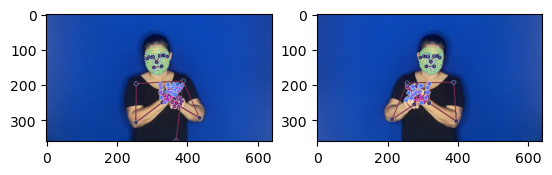

In [28]:
import mediapipe as mp
import cv2
from matplotlib import pyplot as plt
from utils.utils import draw_styled_landmarks, mediapipe_detection

mp_holistic = mp.solutions.holistic

with mp_holistic.Holistic(
  min_detection_confidence=0.5,
  min_tracking_confidence=0.5,
  model_complexity=2,
) as holistic:
  cap = cv2.VideoCapture("../Dataset/fsl-105/clips/34/19.MOV")

  frames = []
  while cap.isOpened():
    ret, frame = cap.read()
    if not ret:
      break
    frames.append(frame)


  frame_idx = 60 * 3
  image, results = mediapipe_detection(frames[frame_idx], holistic)
  draw_styled_landmarks(image, results)

  flipped_image, results = mediapipe_detection(cv2.flip(frames[frame_idx], 1), holistic)
  draw_styled_landmarks(flipped_image, results)

  fig, ax = plt.subplots(1,2)
  ax[0].imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
  ax[1].imshow(cv2.cvtColor(flipped_image, cv2.COLOR_BGR2RGB))

